# Show simulator functionality

Shows how to call both the simulator function and class. The class alows to run multiple simulations per point.

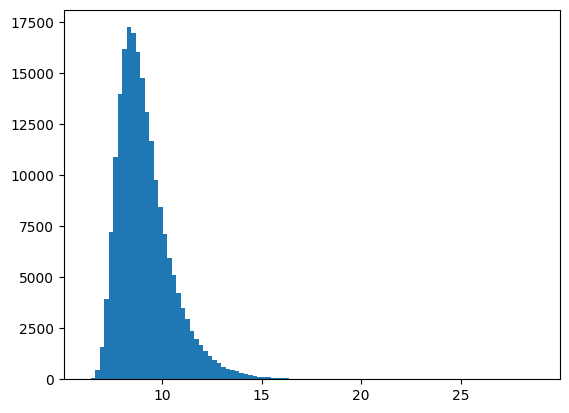

In [1]:
import sys
from pathlib import Path

import numpy as np

from axtreme.simulator import utils as sim_utils

root_dir = Path("../../../../")
sys.path.append(str(root_dir))
from examples.crest_heights_north_sea.problem.simulator import (  # noqa: E402
    MaxCrestHeightSimulator,
    max_crest_height_simulator_function,
)

In [2]:
rng = np.random.default_rng()
hs = rng.normal(10, size=100)
tp = rng.normal(10, size=100)

dummy_environment = np.column_stack((hs, tp))

c_max = max_crest_height_simulator_function(x=dummy_environment, water_depth=110, sample_period=3)
print(c_max)

[[11.52587046]
 [10.27346151]
 [ 9.60163516]
 [10.01829233]
 [12.627265  ]
 [ 9.50173019]
 [11.88606487]
 [ 9.93036002]
 [11.25005945]
 [11.71569738]
 [11.65896944]
 [12.27858078]
 [10.20781973]
 [ 9.00940126]
 [12.15180733]
 [10.46615945]
 [10.69705636]
 [11.42876396]
 [ 9.93530592]
 [12.08846102]
 [ 9.09700355]
 [12.39349597]
 [ 8.92900977]
 [15.22074676]
 [12.4094805 ]
 [11.88945239]
 [12.73494448]
 [12.31690829]
 [10.41162036]
 [ 8.83435438]
 [ 9.31563594]
 [ 8.62299624]
 [ 7.40214803]
 [ 9.64800648]
 [12.3815612 ]
 [13.49862458]
 [11.77522119]
 [12.38542906]
 [11.98369958]
 [10.80422096]
 [ 9.73421158]
 [11.45175107]
 [10.81041006]
 [10.43163542]
 [12.32125241]
 [ 9.40869646]
 [11.29597956]
 [ 9.74088825]
 [13.55760757]
 [ 9.30717703]
 [ 8.8128588 ]
 [11.141759  ]
 [13.04258862]
 [13.89267932]
 [12.11338865]
 [10.34697295]
 [10.12938929]
 [11.41911857]
 [14.7475996 ]
 [14.53083024]
 [11.94725282]
 [11.71016758]
 [10.66665731]
 [16.24730512]
 [11.94632301]
 [ 7.26243645]
 [11.43371

In [3]:
# plot it
from ax import (
    SearchSpace,
)
from ax.core import ParameterType, RangeParameter
from plotly.subplots import make_subplots

from axtreme.plotting.gp_fit import plot_surface_over_2d_search_space

fig = make_subplots(
    rows=1,
    cols=1,
    specs=[[{"type": "surface"}]],
    subplot_titles=("Simulation",),
)

plot_search_space = SearchSpace(
    parameters=[
        RangeParameter(name="x1", parameter_type=ParameterType.FLOAT, lower=7.5, upper=20),
        RangeParameter(name="x2", parameter_type=ParameterType.FLOAT, lower=7.5, upper=20),
    ]
)

# Plot the underlying location and scale function
_ = fig.add_trace(
    plot_surface_over_2d_search_space(plot_search_space, funcs=[max_crest_height_simulator_function]).data[0]
)

# Label the plot
_ = fig.update_scenes(
    {
        "xaxis": {"title": "x1"},
        "yaxis": {"title": "x2"},
        "zaxis": {"title": "response"},
    }
)

# Remove colorbar
_ = fig.update_traces(showscale=False)

# Make figure span the whole window
_ = fig.update_layout(
    autosize=True,
    width=1200,
    height=800,
    margin={"l": 0, "r": 0, "t": 50, "b": 0},
)

fig.show()

At the moment MaxCrestHeightSimulator produces different results at every run. Would be nice to have a seeded version.

Notes:
* the class ForristallCrest used in max_crest_height_simulator_function uses a Weibel distribution
* To Do: pass seed all the way down

In [4]:
sim = MaxCrestHeightSimulator()
sim(x=dummy_environment, water_depth=110, sample_period=3, n_simulations_per_point=3).shape

(100, 3, 1)

In [5]:
sim = MaxCrestHeightSimulator()

print(sim(x=dummy_environment, water_depth=110, sample_period=3)[0, 0, 0])
print("---")
print(sim(x=dummy_environment, water_depth=110, sample_period=3)[0, 0, 0])

10.157524329214615
---
10.483367800213411


In [6]:
print(sim_utils.is_valid_simulator(sim, verbose=True))

True
